# Flight Delay Trend Analysis and Forecasting


---



---



## **Project Overview**
This project analyzes historical monthly flight delay data to identify long-term trends and seasonal patterns. Linear regression models are developed to forecast delays and evaluate predictive performance.

## **Dataset**
The dataset contains aggregated monthly flight delay data from the Australian Government Domestic Airlines – On Time Performance dataset.

Columns used:
- Month
- Arrivals_Delayed

## **Objectives**
- Analyze delay trends over time  
- Visualize monthly delay patterns  
- Develop a baseline trend model  
- Improve the model by incorporating seasonal effects  
- Evaluate predictive performance using R-squared and Mean Absolute Error  


## **Tools Used**
- Python  
- Pandas  
- Matplotlib  
- Seaborn  
- Statsmodels


---



### 1. Importing Libraries



This section imports the libraries required for data analysis, visualization, and regression modeling.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

### 2. Loading and Preparing the Dataset

The dataset is loaded into a pandas DataFrame.  
The `Month` column is converted to datetime format to enable time-series analysis and is set as the index for easier trend visualization.

In [2]:
# load the data
df = pd.read_csv('delayed_arrivals.csv')

# convert the Month column to datetime
df["Month"] = pd.to_datetime(df["Month"], format="%b-%y")

# set the Month column as the index
df.set_index("Month", inplace=True)

# visualize the first values
df.head()

,Arrivals_Delayed
Month,
2004-01-01,6996.0
2004-02-01,5166.0
2004-03-01,4768.0
2004-04-01,5429.0
2004-05-01,4540.0


### 3. Time-Series Visualization

A line plot is created to visualize monthly flight delays over time.  
This helps identify overall trends, seasonal patterns, and unusual changes in delay volume.

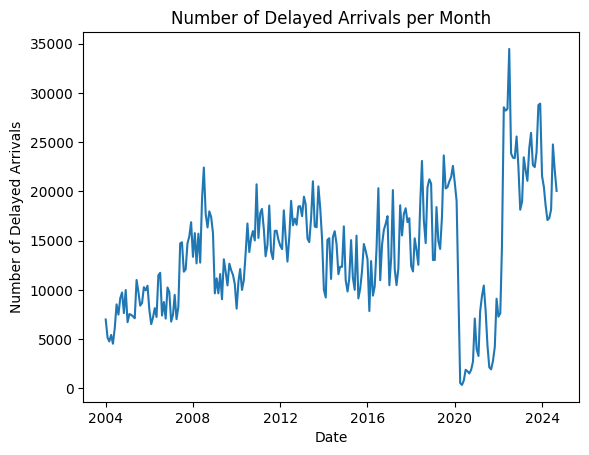

In [3]:
# Plot the time-series
sns.lineplot(data=df, x=df.index, y="Arrivals_Delayed")

plt.ylabel("Number of Delayed Arrivals")
plt.xlabel("Date")
plt.title("Number of Delayed Arrivals per Month")

plt.show()

### Observations

- Flight delays show an overall upward trend over time.
- A significant decline is visible around 2020, likely due to reduced air travel.
- After 2020, delay counts increase sharply, indicating recovery and higher flight activity.
- Recent years show higher variability in monthly delays.


---



## 4. Trend Modeling with Linear Regression

To model the overall trend, a linear regression model is trained using time as the input.  
Each month is converted into a numeric index (`idx`) so the model can learn how delays change over time.

In [4]:
# add the idx column
df["idx"] = range(len(df))

# select the independent variable
predictor = ["idx"]

# add the constant term
X = sm.add_constant(df[predictor])

# select the dependent variable
Y = df["Arrivals_Delayed"]

# create and fit the model
model = sm.OLS(Y,X)
results = model.fit()

# print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Arrivals_Delayed   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     44.63
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           1.57e-10
Time:                        03:45:30   Log-Likelihood:                -2499.1
No. Observations:                 249   AIC:                             5002.
Df Residuals:                     247   BIC:                             5009.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9841.7016    701.505     14.029      0.0

### Model Evaluation

The coefficient for `idx` is statistically significant (p-value < 0.001), indicating that flight delays show a meaningful upward trend over time.

The R-squared value of 0.153 suggests that approximately 15.3% of the variation in monthly flight delays is explained by the time trend alone. While the trend is statistically significant, the relatively low R-squared indicates that additional factors likely influence delay patterns.

Overall, the model captures the general direction of delay growth but does not account for seasonal effects, external disruptions, or operational variables.


---



### 5. Regression Visualization

The regression plot below shows the relationship between time (month index) and delayed arrivals.  
The black line represents the fitted linear trend, illustrating the overall direction of delays over time.

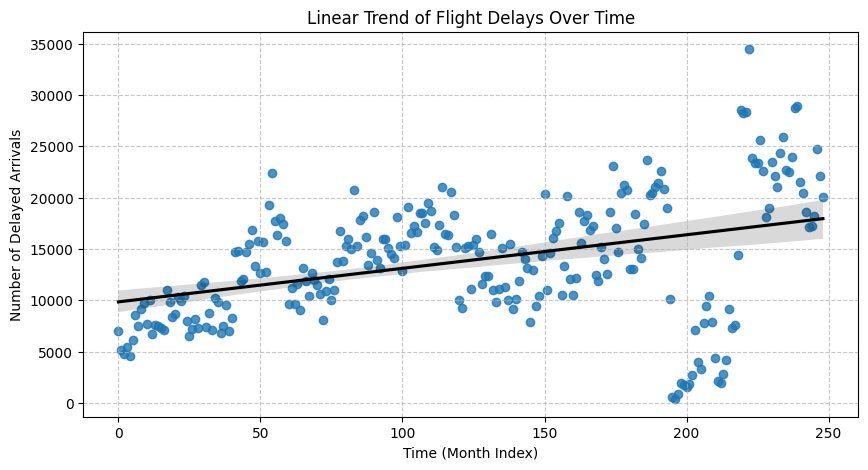

In [5]:
plt.figure(figsize=(10, 5))

sns.regplot(x="idx", y="Arrivals_Delayed", data=df, line_kws={"color": "black"})

plt.grid(alpha=0.7, linestyle="--")
plt.xlabel("Time (Month Index)")
plt.ylabel("Number of Delayed Arrivals")
plt.title("Linear Trend of Flight Delays Over Time")

plt.show()

### Interpretation

The regression line confirms a positive trend in flight delays over time.  
Although there is noticeable variability in monthly delays, the overall direction indicates gradual growth in delayed arrivals.

The wide spread of points around the trend line further supports the earlier finding that additional variables may be needed to improve predictive performance.


---



### 6. Incorporating Seasonal Patterns

To improve the model, seasonal effects are introduced by extracting the quarter from the date index.

By adding a seasonal variable, the model can capture recurring patterns in flight delays throughout the year.


                            OLS Regression Results                            
Dep. Variable:       Arrivals_Delayed   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     28.20
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           9.41e-12
Time:                        03:45:30   Log-Likelihood:                -2494.1
No. Observations:                 249   AIC:                             4994.
Df Residuals:                     246   BIC:                             5005.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7425.2198   1025.464      7.241      0.0

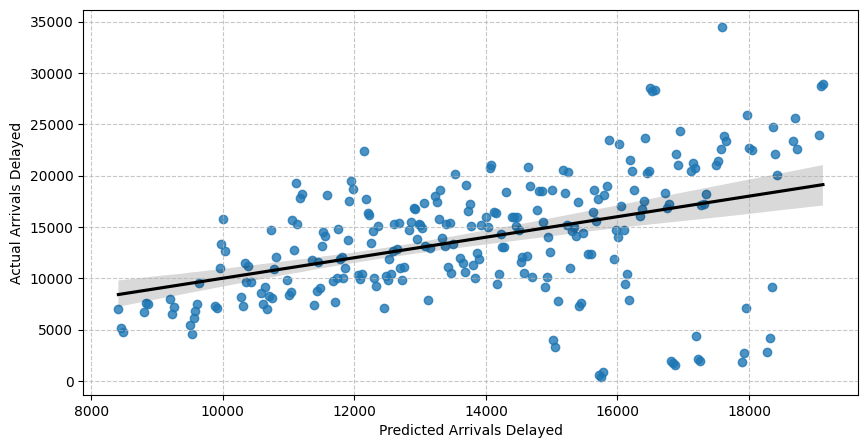

In [6]:
# add the Season column
df["Season"] = df.index.quarter

# select the independent variable
predictors = ["idx", "Season"]

# add the constant term
X_seasonal = sm.add_constant(df[predictors])

# create and fit the model
model_seasonal = sm.OLS(Y, X_seasonal)
results_seasonal = model_seasonal.fit()
# print the summary
print(results_seasonal.summary())

# Analyzing the training results
plt.figure(figsize=(10, 5))

# find the predicted values
y_pred = results_seasonal.predict(X_seasonal)

# Create the regression plot
sns.regplot(x=y_pred, y=Y, line_kws={'color': 'black'})

# add labels
plt.xlabel("Predicted Arrivals Delayed")
plt.ylabel("Actual Arrivals Delayed")
# add grid
plt.grid(alpha=0.7, linestyle="--")
plt.show()

### Seasonal Model Evaluation and Prediction Analysis

The enhanced model incorporates both time (`idx`) and seasonal effects (`Season`) as predictors.

The R-squared increased from 0.153 in the baseline model to 0.187 after adding seasonality, indicating improved explanatory power.

Both predictors are statistically significant (p-value < 0.01), confirming that flight delays are influenced by long-term trends and recurring seasonal patterns.

The predicted values generally follow the direction of actual delays, although variability remains. This suggests that while the model captures structural patterns, additional variables may be required for higher predictive accuracy.


---



### 7. Model Error Evaluation (Mean Absolute Error)

To further evaluate predictive performance, the Mean Absolute Error (MAE) is calculated.

MAE measures the average magnitude of prediction errors and provides a direct interpretation of how far predictions deviate from actual values.

In [8]:
# get the residuals
residuals = Y - y_pred

# get the mean absolute error
MAE = residuals.abs().mean()

# print the mean absolute error
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 3974.057910265702


### Interpretation of MAE

The Mean Absolute Error is approximately 3,974 delayed arrivals per month.

This means that, on average, the model's predictions differ from the actual number of delayed arrivals by about 3,974.

Considering that monthly delays range between roughly 5,000 and 35,000, this error level indicates moderate predictive accuracy.

While the model captures overall trends and seasonal structure, additional predictors would likely be needed to significantly reduce forecasting error.


---



## Key Findings

- Flight delays show a statistically significant upward trend over time.
- Seasonal patterns contribute to delay variation and improve model performance.
- Adding seasonality increased the R-squared from 0.153 to 0.187.
- The Mean Absolute Error of approximately 3,974 indicates moderate predictive accuracy.
- Additional variables would likely improve forecasting performance.

## Conclusion

This analysis examined historical flight delay data to identify trends and improve forecasting accuracy.

A baseline linear regression model revealed a statistically significant upward trend in delayed arrivals over time. Incorporating seasonal patterns improved model performance, increasing the R-squared from 0.153 to 0.187.

The Mean Absolute Error of approximately 3,974 indicates moderate predictive accuracy. While the model captures long-term and seasonal patterns, additional variables such as weather conditions, airline differences, or operational factors could further enhance forecasting performance.

Overall, the analysis demonstrates how trend modeling and feature engineering can improve predictive insights in time-series data.
